In [1]:
import geopandas as gpd
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from adjustText import adjust_text
from scipy.stats import kendalltau, pearsonr

C:\Users\cnavarreteliz\AppData\Roaming\Python\Python39\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
year = 2019
month = 11
location_level = "province_id"

In [3]:
# provinces communities
gdf = gpd.read_file("https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/spain-provinces.geojson")
# gdf["state_id"] = gdf["cod_ccaa"].astype(int)
gdf["province_id"] = gdf["cod_prov"].astype(int)
gdf

,cod_prov,name,cod_ccaa,cartodb_id,created_at,updated_at,geometry,province_id
0,07,Illes Balears,03,7,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((3.21365 39.95751, 3.15440 39.9...",7
1,33,Asturias,18,33,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-5.84083 43.66062, -5.83002 43...",33
2,15,A Coruña,11,15,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-7.68030 43.78714, -7.66231 43...",15
3,17,Girona,08,17,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((1.74871 42.49482, 1.82355 42.4...",17
4,35,Las Palmas,04,35,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-13.89051 28.75685, -13.83632 ...",35
5,36,Pontevedra,11,36,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-8.18101 42.85828, -8.11637 42...",36
6,38,Santa Cruz De Tenerife,04,38,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-16.15754 28.58816, -16.12669 ...",38
7,39,Cantabria,05,39,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-3.59024 43.51356, -3.54634 43...",39
8,29,Málaga,01,29,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-4.40658 37.27412, -4.37894 37...",29
9,04,Almería,01,4,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-2.18191 37.89882, -2.17201 37...",4


In [4]:
output = []
country = "France"
location_level = "department"
for index, row in gdf2.to_crs(epsg=4326).iterrows():
    point = row.geometry.centroid
    longitude = point.x
    latitude = point.y
    output.append({
        "latitude": latitude,
        "longitude": longitude,
        location_level: row[location_level]
    })
pd.DataFrame(output).to_csv(f"data_distances/{country}_{location_level}.csv", index=False)

NameError: name 'gdf2' is not defined

In [6]:
location_level = "province_id"
df = pd.read_csv(f"data_output/Spain/{year}_divisiveness_{location_level}.csv.gz", compression="gzip")
df = df.dropna()
df.head()

,province_id,candidate,value
0,1,Cs ...,0.008533
1,1,PODEMOS-IU ...,0.049159
2,1,PP ...,0.075570
3,1,VOX ...,0.018225
4,2,Cs ...,0.027429


(-19.28567235, 5.4522353500000005, 26.8319047, 44.5999913)

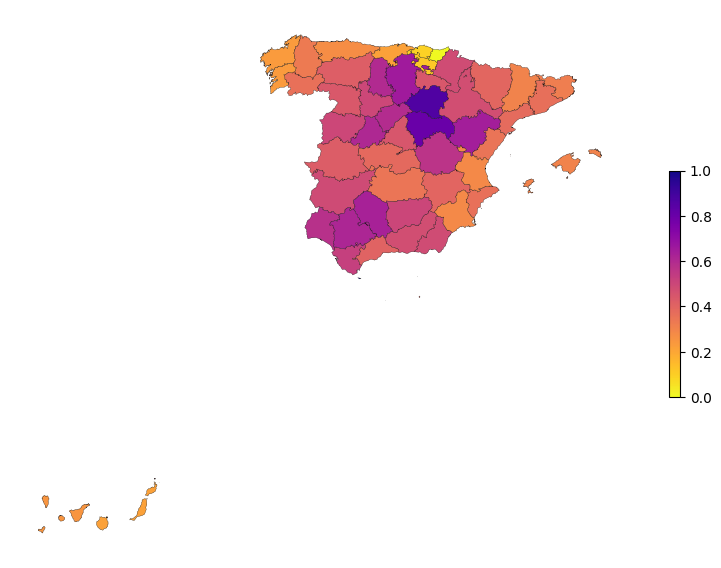

In [7]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

data_tmp = df.groupby(["province_id"]).agg({"value": "mean"}).reset_index()
data_tmp = pd.merge(data_tmp, gdf, on="province_id")

data_tmp = gpd.GeoDataFrame(data_tmp)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

data_tmp["value"] = NormalizeData(data_tmp["value"])

data_tmp.plot(
    column="value", 
    edgecolor="black",
    cmap="plasma_r",
    lw=0.2,
    ax=ax, 
    legend=True, 
    legend_kwds=dict(
        shrink=0.3
    )
)

plt.axis("off")

In [8]:
gdf3 = gpd.read_file("https://raw.githubusercontent.com/okfde/wahldaten/master/geometrien/wahlkreise/wahlkreise.geojson")
gdf3

,WKR_NR,WKR_NAME,LAND_NR,LAND_NAME,geometry
0,1,Flensburg  Schleswig,01,Schleswig-Holstein,"POLYGON ((9.67691 54.83785, 9.73284 54.82495, ..."
1,2,Nordfriesland  Dithmarschen Nord,01,Schleswig-Holstein,"MULTIPOLYGON (((8.73594 54.46762, 8.73496 54.4..."
2,3,Steinburg  Dithmarschen Süd,01,Schleswig-Holstein,"MULTIPOLYGON (((8.69258 54.06045, 8.69364 54.0..."
3,4,Rendsburg-Eckernförde,01,Schleswig-Holstein,"POLYGON ((9.97162 54.64695, 9.97222 54.64665, ..."
4,5,Kiel,01,Schleswig-Holstein,"POLYGON ((10.17204 54.43246, 10.17346 54.43039..."
...,...,...,...,...,...
294,295,Zollernalb  Sigmaringen,08,Baden-Württemberg,"POLYGON ((8.79591 48.41598, 8.79680 48.41521, ..."
295,296,Saarbrücken,10,Saarland,"POLYGON ((6.92744 49.32654, 6.93413 49.32415, ..."
296,297,Saarlouis,10,Saarland,"POLYGON ((6.88754 49.61347, 6.88887 49.61326, ..."
297,298,St. Wendel,10,Saarland,"POLYGON ((7.05908 49.63048, 7.06285 49.62778, ..."


In [9]:
df3 = pd.read_csv(f"data_output/Germany/2021_divisiveness_constituency.csv.gz", compression="gzip")
df3 = df3.dropna()
gdf3 = gdf3.rename(columns={"WKR_NR": "constituency"})

data_tmp3 = df3.groupby(["constituency"]).agg({"value": "mean"}).reset_index()
data_tmp3 = pd.merge(data_tmp3, gdf3, on="constituency")

data_tmp3 = gpd.GeoDataFrame(data_tmp3)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

data_tmp3["value"] = NormalizeData(data_tmp3["value"])


(-19.821373882841574, 16.701967539673074, 26.26860307001754, 56.42932552963157)

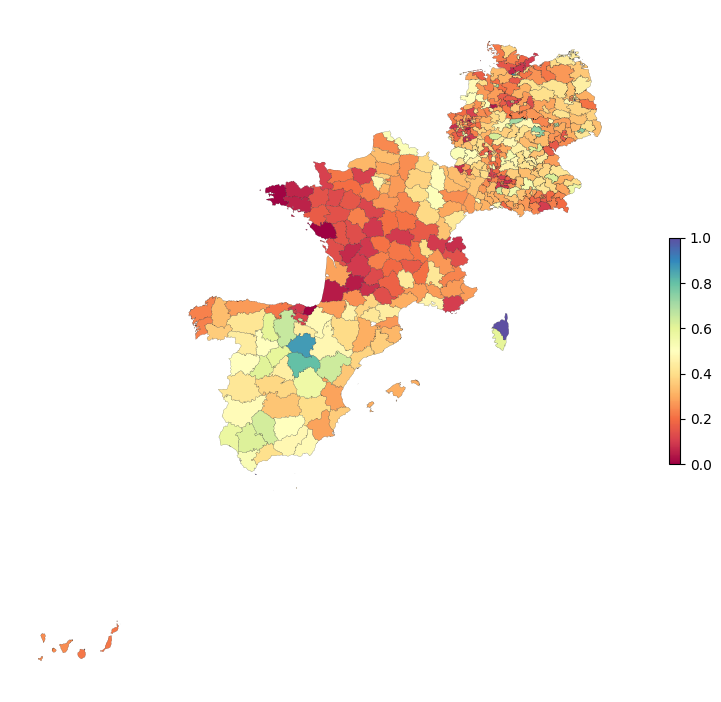

In [23]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
asd = pd.concat([data_tmp, data_tmp2, data_tmp3])
# asd["value"] = 1 / asd["value"]
asd.plot(column="value", ax=ax, 
    lw=0.1,
    legend=True, 
    edgecolor="black",
         cmap="Spectral",
    legend_kwds=dict(
        shrink=0.3
    ))

plt.axis("off")

In [17]:
data_tmp2.sort_values("value")

,department,value,code,geometry
91,Vendée,0.000000,85,"MULTIPOLYGON (((-2.30479 46.70942, -2.33559 46..."
30,Finistère,0.007222,29,"MULTIPOLYGON (((-5.10260 48.43612, -5.10360 48..."
57,Lot-et-Garonne,0.043129,47,"POLYGON ((0.29733 44.76228, 0.32329 44.74762, ..."
51,Landes,0.043202,40,"POLYGON ((-0.24284 43.58498, -0.27640 43.58476..."
65,Morbihan,0.056675,56,"MULTIPOLYGON (((-3.42179 47.62000, -3.44067 47..."
...,...,...,...,...
64,Meuse,0.496075,55,"POLYGON ((4.95099 49.23687, 4.96436 49.24745, ..."
38,Haute-Marne,0.514962,52,"POLYGON ((4.67018 48.53189, 4.71801 48.54199, ..."
68,Nord,0.517076,59,"MULTIPOLYGON (((3.04040 50.15971, 3.06301 50.1..."
19,Corse-du-Sud,0.594677,2A,"POLYGON ((8.57341 42.38141, 8.59497 42.37044, ..."


In [22]:
gdf2 = gpd.read_file("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson")
df2 = pd.read_csv(f"data_output/France/2022_divisiveness_department.csv.gz", compression="gzip")
df2 = df2.dropna()
gdf2 = gdf2.rename(columns={"nom": "department"})

display(df2)
data_tmp2 = df2.groupby(["department"]).agg({"value": "mean"}).reset_index()
data_tmp2 = pd.merge(data_tmp2, gdf2, on="department")
# data_tmp2 = data_tmp2[~data_tmp2["code"].isin(["2A", "2B"])]
data_tmp2 = gpd.GeoDataFrame(data_tmp2)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

data_tmp2["value"] = NormalizeData(data_tmp2["value"])


,department,candidate,value
0,Ain,Emmanuel MACRON,0.053806
1,Ain,Fabien ROUSSEL,0.012031
2,Ain,Jean LASSALLE,0.017987
3,Ain,Jean-Luc MÉLENCHON,0.059014
4,Ain,Marine LE PEN,0.065168
...,...,...,...
958,Yvelines,Marine LE PEN,0.071506
959,Yvelines,Nicolas DUPONT-AIGNAN,0.007639
960,Yvelines,Valérie PÉCRESSE,0.036441
961,Yvelines,Yannick JADOT,0.019890
